# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
from pathlib import Path

# Get the current working directory dynamically
current_dir = os.getcwd()

# Define paths
resources_dir = os.path.join(current_dir,"data")

# Define file paths dynamically for the CSV files within 'data'
mouse_metadata_to_load = os.path.join(resources_dir, "Mouse_metadata.csv")
study_results_to_load = os.path.join(resources_dir ,"Study_results.csv")


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_to_load)
study_results = pd.read_csv(study_results_to_load)

# Combine the data into a single DataFrame
# Merge the mouse metadata and study results DataFrames on 'Mouse ID'
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
# Display the first few rows of the combined DataFrame
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [127]:
# Checking the number of mice.
# Count the number of unique Mouse IDs in the combined data
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [128]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [129]:
# Optional: Get all the data for the duplicate mouse ID.
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [130]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data= cleaned_data= combined_data[combined_data["Mouse ID"] != "g989"]
cleaned_data
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [131]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned_dataframe = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned_dataframe

248

## Summary Statistics

In [132]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Group by 'Drug Regimen' and calculate the summary statistics
summary_stats = cleaned_data.groupby(['Drug Regimen'])

summary_mean = summary_stats['Tumor Volume (mm3)'].mean()
summary_med = summary_stats['Tumor Volume (mm3)'].median()
summary_var = summary_stats['Tumor Volume (mm3)'].var()
summary_std = summary_stats['Tumor Volume (mm3)'].std()
summary_sem = summary_stats['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
                        "Mean Tumor Volume": summary_mean,
                        "Median Tumor Volume" : summary_med,
                        "Tumor Volume Variance" : summary_var,
                        "Tumor Volume Std. Dev." : summary_std,
                        "Tumor Volume Std. Err." : summary_sem
                        })
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [133]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = cleaned_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

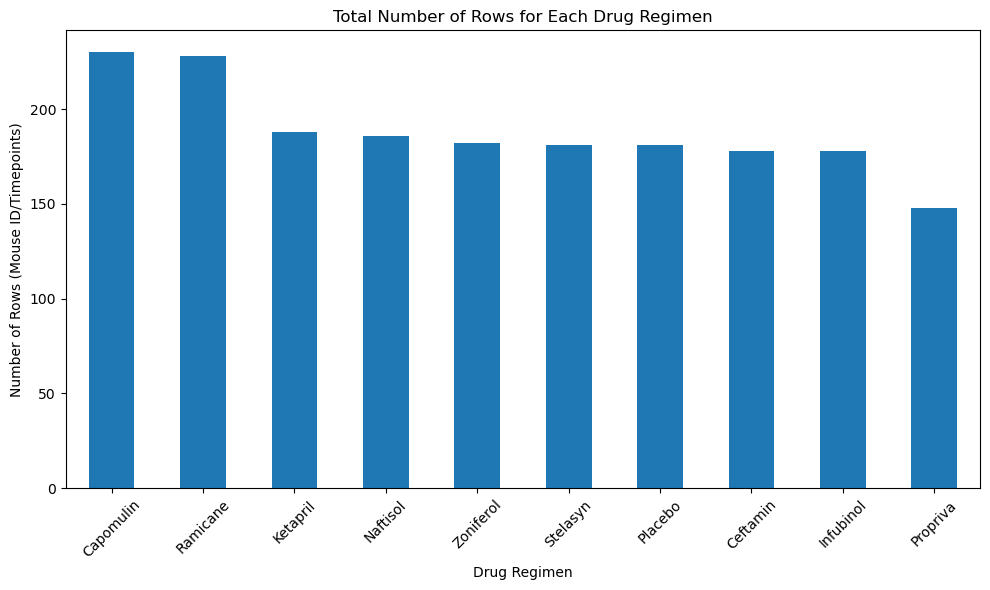

In [134]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each Drug Regimen
drug_counts = cleaned_data.groupby("Drug Regimen").size().sort_values(ascending=False)

# Create a bar plot
drug_counts.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

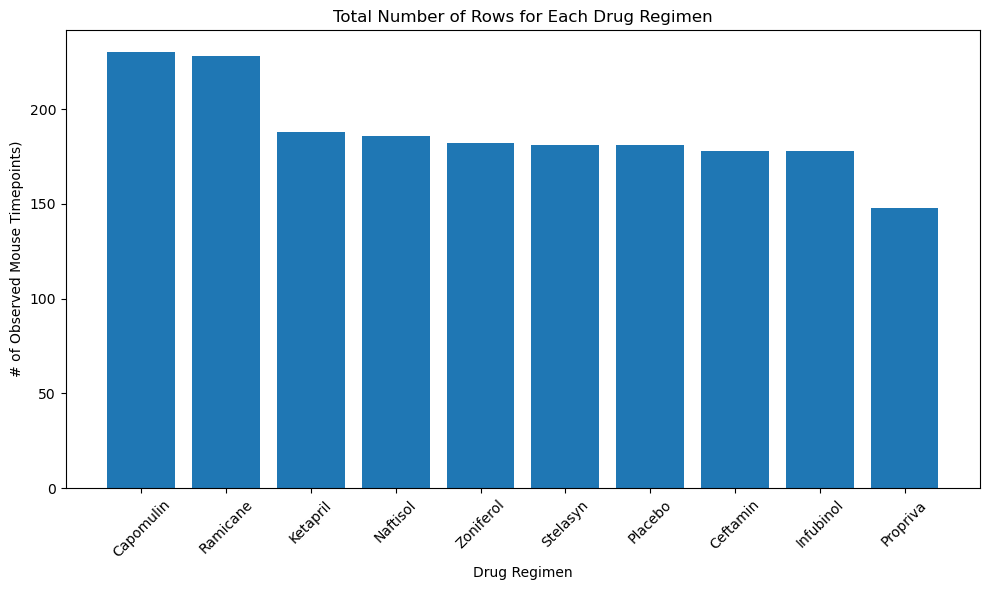

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each Drug Regimen and sort in descending order
drug_counts = cleaned_data.groupby("Drug Regimen").size().sort_values(ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot using pyplot
ax.bar(drug_counts.index, drug_counts.values)

# Set the title and labels
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


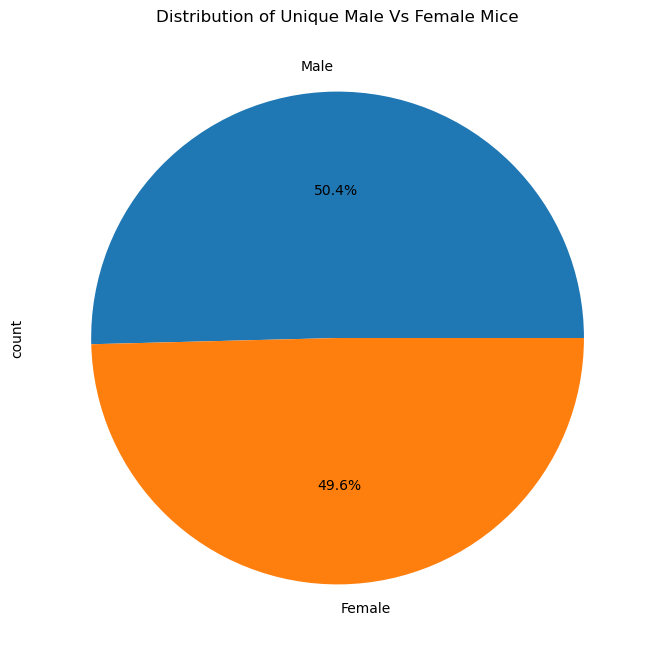

In [136]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()
gender_counts
# Make the pie chart
# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, figsize=(8, 8))
# Set the title
plt.title('Distribution of Unique Male Vs Female Mice')
plt.ylabel('count')
plt.show()

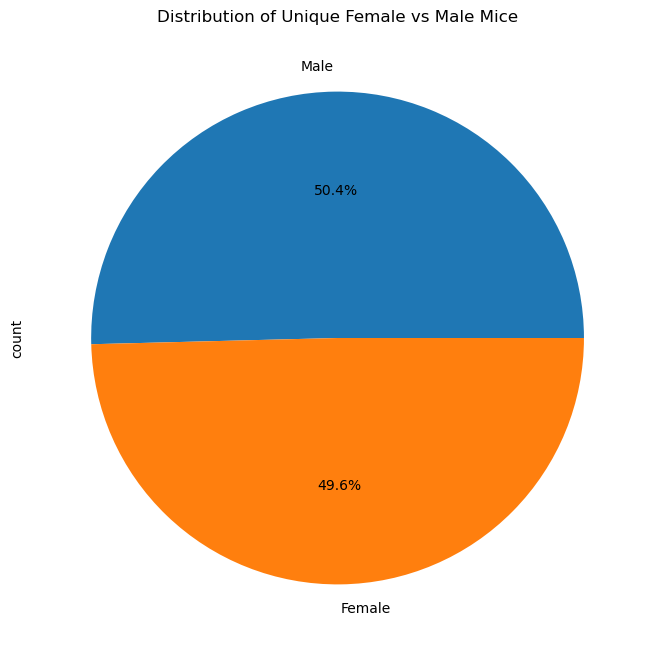

In [137]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using pyplot
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)

# Set the title
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')
# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = cleaned_data.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
greatest_tp

Drug Regimen  Mouse ID
Capomulin     b128        45
              b742        45
              f966        20
              g288        45
              g316        45
                          ..
Zoniferol     q633        45
              s337        45
              w140         5
              w575        45
              x613        15
Name: Timepoint, Length: 248, dtype: int64

In [139]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df = pd.merge(greatest_tp_df, cleaned_data, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
#greatest_tp_df.info()
greatest_tp_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the    IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes
      tumor_volumes = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
      tumor_vol_data.append(tumor_volumes)
    # Determine Quartiles, IQR, Lower Bound, Upper Bound    
      quartiles = tumor_volumes.quantile([0.25,0.5,0.75])

iqr = quartiles[0.75] - quartiles[0.25]

lower_bound = quartiles[0.25] - (1.5*iqr)
upper_bound = quartiles[0.75] + (1.5*iqr)

# Determine outliers using upper and lower bounds
outliers = tumor_volumes.loc[(tumor_volumes > upper_bound) | (tumor_volumes < lower_bound)]
   # print(f"{(outliers)}")
print(f"Outlier: {(outliers)}")
print(f"{treatment}:")
print(f"  Tumor Volume Data: {tumor_volumes.tolist()}")
print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"  Outliers: {tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)].tolist()}")
print()  # Just for spacing


Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
  Tumor Volume Data: [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.7846818, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]
  Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
  Outliers: []



In [141]:
iqr

15.577752179999997

In [142]:
lower_bound

25.355449580000002

In [143]:
upper_bound

87.66645829999999

In [144]:
tumor_vol_data

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 174    38.407618
 175    43.047543
 176    38.810366
 177    32.978522
 178    38.342008
 179    33.397653
 180    37.311236
 181    40.659006
 182    29.128472
 183    33.562402
 184    36.374510
 185    31.560470
 186    36.134852
 187    22.050126
 188    30.564625
 189    31.095335
 190    45.220869
 191    36.561652
 192    37.225650
 193    43.419381
 194    30.276232
 195    40.667713
 196    43.166373
 197    44.183451
 198    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52  

/var/folders/56/3t6cjshx4nj98r116gg4m1_w0000gn/T/ipykernel_65506/3810056083.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data,  flierprops=red_dot,labels=treatment, patch_artist=True)


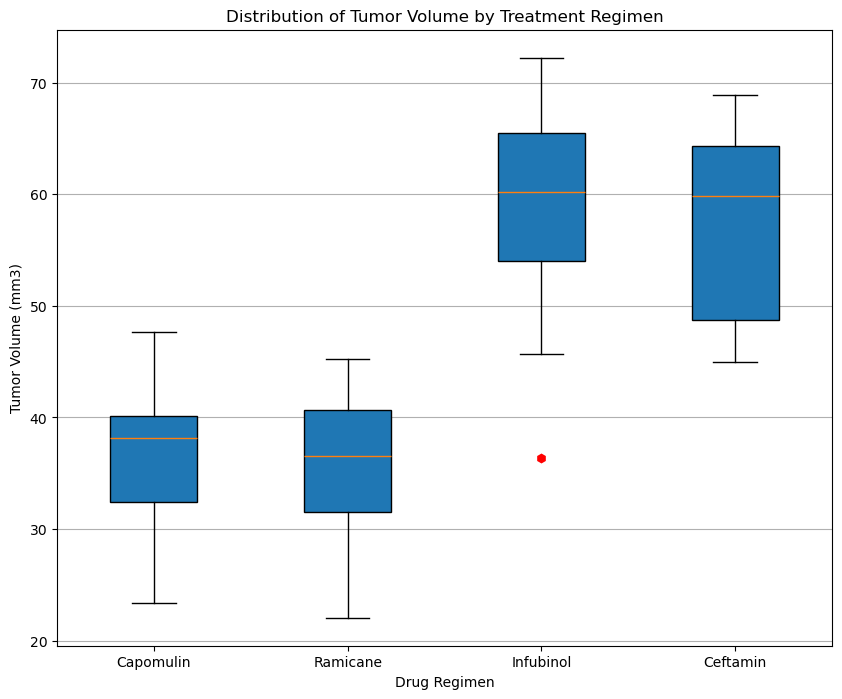

In [145]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


# Generate a box plot
plt.figure(figsize=(10,8))
red_dot = dict(markerfacecolor="r",marker="h", markeredgecolor="r")
plt.boxplot(tumor_vol_data,  flierprops=red_dot,labels=treatment, patch_artist=True)

# Set title and labels
plt.title('Distribution of Tumor Volume by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Customize the box plot colors
colors = ['lightblue', 'salmon', 'lightgreen', 'lightcoral']
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

# Show the plot
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()


## Line and Scatter Plots

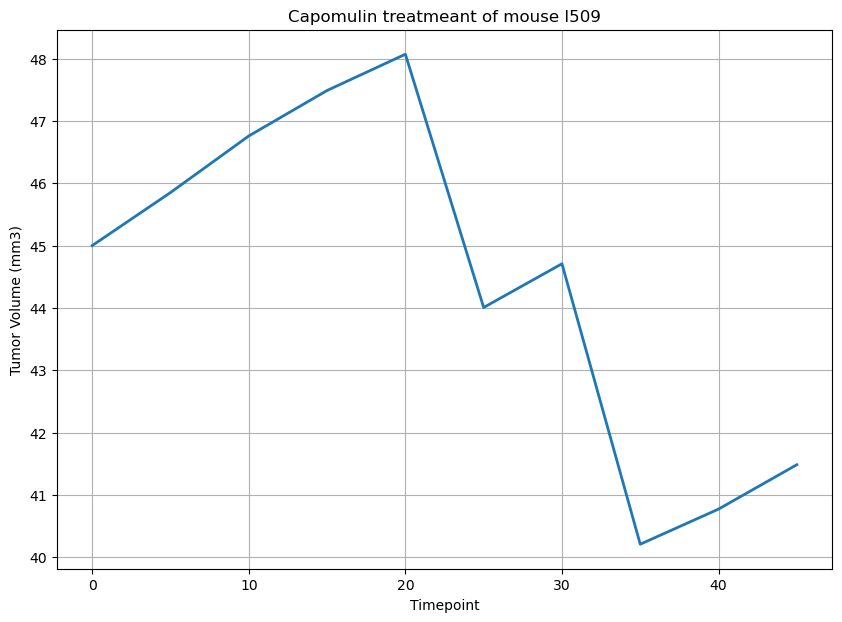

In [146]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the combined data for a specific mouse treated with Capomulin
line_df = cleaned_data.loc[cleaned_data["Mouse ID"] == "l509",:]
line_df

time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"] 

#print(random_mouse["Mouse ID"])
plt.figure(figsize=(10,7))
line, = plt.plot(time, vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")

plt.grid()

plt.show()


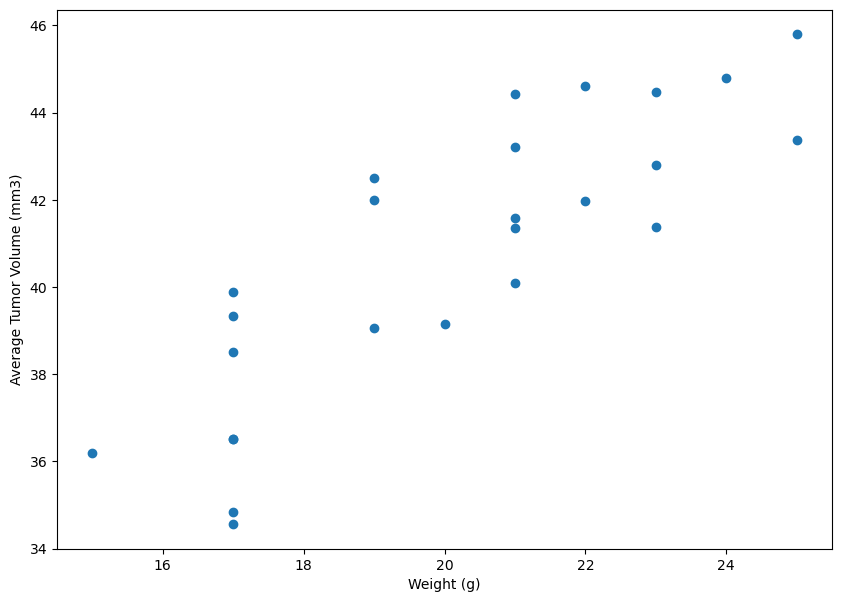

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [147]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]

vol_avg = scatter_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()    # use groupby() and mean() to create a dataframe

# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the vol_avg dataframe
plt.figure(figsize=(10,7))
plt.scatter(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
vol_avg


## Correlation and Regression

In [148]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [149]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
lin_reg=st.linregress(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
lin_reg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [150]:
slope=0.9544396890241045
intercept=21.552160532685015 
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07 
stderr=0.1275435903320134

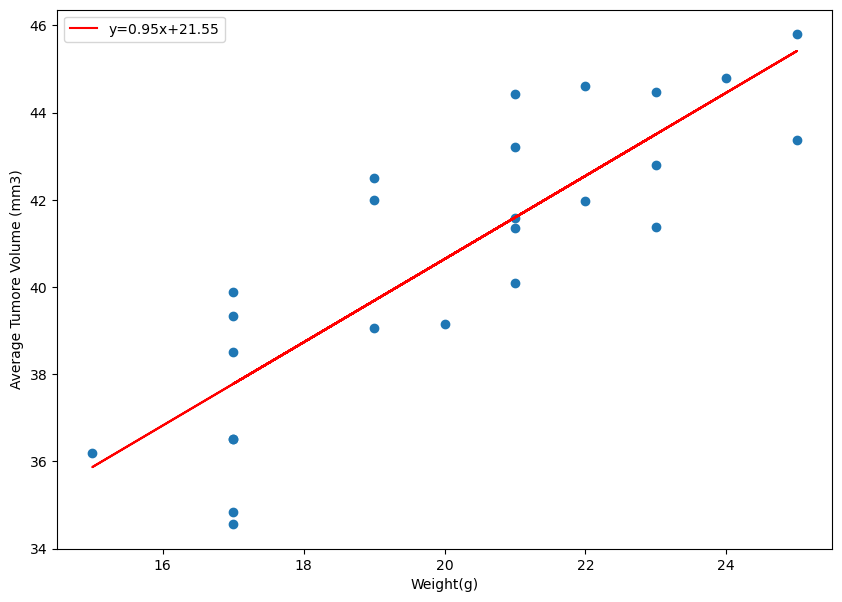

In [151]:
# ploting the regression line
# calculate the the linear line plot list of values
line = slope*(vol_avg['Weight (g)'])+intercept
# create the scatter plot like above
plt.figure(figsize=(10,7))
plt.scatter(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(vol_avg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend(loc="best")                                   # adding legend
#plt.savefig('linearregression')
plt.show()